## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from obspy import UTCDateTime
from andbro__querrySeismoData import __querrySeismoData

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [14]:
## Configurations

config = {}

config['tbeg'] = UTCDateTime("2022-08-16 00:00")
config['tend'] = UTCDateTime("2022-08-16 23:00")

# config['seed'] = "BW.ROMY.10.BJZ"
config['seed'] = "BW.DROMY..FJZ"


config['repository'] = "george"

config['outpath'] = f''
config['outfile'] = f''

config['outfigs'] = f''

## Load Rotation Data

In [15]:
def __load_romy_raw(seed, starttime, endtime):

    import obspy
    import io
    from pandas import date_range
    from os import path
    
    tbeg = obspy.UTCDateTime(starttime-10)
    tend = obspy.UTCDateTime(endtime+10)

    net, sta, loc, cha = seed.split(".")
    
    reclen = 512
    chunksize = 100000 * reclen # Around 50 MB
    
    st0 = obspy.Stream()

    for dt in date_range(tbeg.date, tend.date):
    
        doy = UTCDateTime(dt).julday
        year = UTCDateTime(dt).year
        
        print(doy)
    
        archive= f"/import/freenas-ffb-01-data/romy_archive/{year}/{net}/{sta}/{cha}.D/"
        file = f"{net}.{sta}.{loc}.{cha}.D.{year}.{doy}"
        
        if not path.exists(archive+file):
            print(f" -> file for {doy} does not exist!")
        
        with io.open(archive+file, "rb") as fh:
            while True:
                with io.BytesIO() as buf:
                    c = fh.read(chunksize);
                    if not c:
                        break
                    buf.write(c);
                    buf.seek(0, 0);
                    st = obspy.read(buf);
        st0 += st
        
    st0.merge()

    st0.trim(tbeg, tend)
    
    return st0 

In [16]:
st0 = __load_romy_raw("BW.DROMY..FJZ", config['tbeg'], config['tend'])

227
228


/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/imaging/waveform.py:772: UserWarning: Warning: converting a masked element to nan.
  tr.data[-remaining_samples:].min() * tr.stats.calib
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/imaging/waveform.py:774: UserWarning: Warning: converting a masked element to nan.
  tr.data[-remaining_samples:].max() * tr.stats.calib


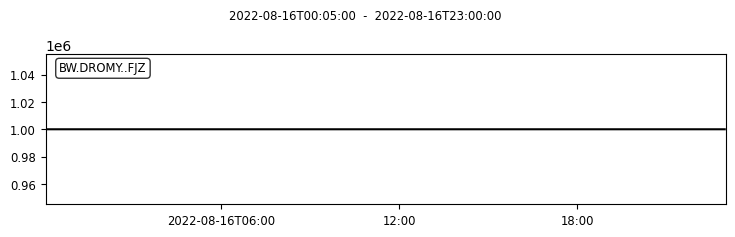

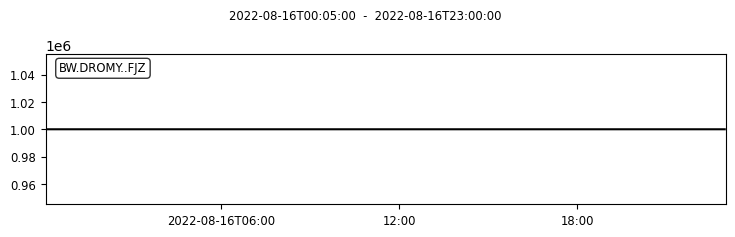

In [19]:
st0.plot();

In [18]:
st0.trim(config['tbeg']+300, config['tend'])

1 Trace(s) in Stream:
BW.DROMY..FJZ | 2022-08-16T00:05:00.000000Z - 2022-08-16T23:00:00.000000Z | 5000.0 Hz, 412500001 samples (masked)

In [ ]:
from andbro__makeplot_trace_spectrum import __makeplot_trace_and_spectrum

__makeplot_trace_and_spectrum(st0[0], axis_scale="loglog");


In [ ]:
# st, inv = __querrySeismoData(
#                             seed_id=config['seed'],
#                             starttime=config['tbeg']-10,
#                             endtime=config['tend']+10,
#                             repository=config['repository'],
#                             path=None,
#                             restitute=False,
#                             detail=None,
#                             fill_value=None,
# )


# st.trim(config['tbeg'], config['tend'])

# st.remove_sensitivity(inv)

# st.detrend("demean")